In [70]:
import numpy as np
import matplotlib.pyplot as plt

In [71]:
mean_1 = np.array([0, 0])
mean_2 = np.array([-2 ,2])
mean_3 = np.array([2, 2])
mean = np.array([mean_1, mean_2, mean_3])
cov = np.array([[1, 0], [0, 1]])
samplesPerClass = 500

In [72]:
classes = np.array([np.random.multivariate_normal(mean[i], cov, samplesPerClass) for i in range(3)])
colors = np.array(['blue', 'red', 'yellow'], dtype=object)

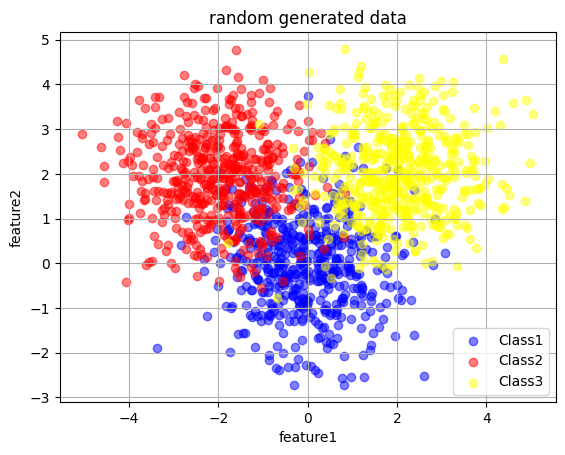

In [73]:
for i in range(3):
    plt.scatter(classes[i][:, 0], classes[i][:, 1], alpha=0.5, label = 'Class' + str(i+1) ,color = colors[i])
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.legend()
plt.title("random generated data")
plt.grid(True)    

In [74]:
def pdf(xi, Hn, x):
    return np.exp(-(np.matmul(x-xi, x-xi))/2*(Hn**2))

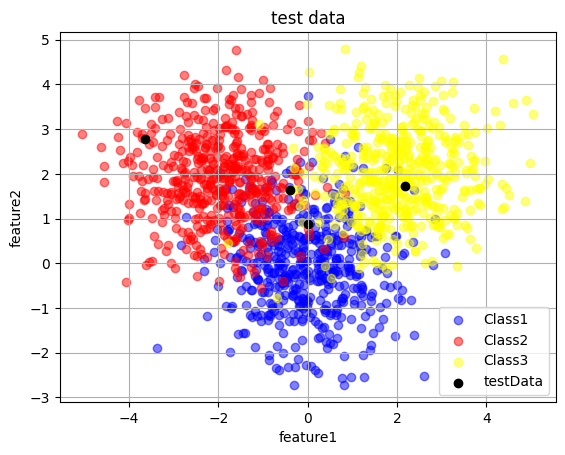

In [75]:
#true labels : 1, 2, 3, 2
testSamplesMean = np.array([mean[0], mean[1], mean[2], mean[1]])
randomTestData = np.array([np.random.multivariate_normal(mean_, cov, 1).flatten() for mean_ in testSamplesMean])
for i in range(3):
    plt.scatter(classes[i][:, 0], classes[i][:, 1], alpha=0.5, label = 'Class' + str(i+1) ,color = colors[i])
plt.scatter(randomTestData[:, 0], randomTestData[:, 1], alpha=1, label='testData', color = 'black')    
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.legend()
plt.title("test data")
plt.grid(True)

In [76]:
def calcDensitiy(x, classIndex, Vn):
    return (1/samplesPerClass)*(1/Vn)*np.sum([pdf(x_, np.sqrt(Vn), x) for x_ in classes[classIndex]])

In [78]:
Vn = 1
prediction = []
for testSample in randomTestData:
    densities = []
    for i in range(3):
        densities.append(calcDensitiy(testSample, i, Vn))
    prediction.append(np.argmax(densities) + 1)

prediction    

[1, 2, 3, 2]